# 지리 정보 데이터 처리

지리정보데이터, GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 , 우편번호 등이 있다. 이 절에서는 지리정보를 처리하는데 유용한 패키지와 지리 정보 데이터를 처리하는 방법에 대해 설명할 것이다. 

## GeoPandas

GeoPandas는 파이썬에서 지리정보 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지이다. 
이름으로도 알 수 있듯이, GeoPandas는 Pandas와 비슷하다. 두 가지의 자료형 `GeoSeries`와 `GeoDataFrame`이 있다. 다루는 방법에 큰 차이가 없다. 다만 지리정보 데이터 분석에 유용한 속성과 메서드가 존재한다. 다음처럼 `gpd`라는 이름으로 임포트 하는 것이 관례이다.

In [1]:
import geopandas as gpd
gpd.__version__

'0.4.1'

GeoPandas는 간단한 지리정보데이터를 실습 할 수 있는 샘플 데이터 셋을 제공한다. 이 데이터를 사용해 GeoPandas의 기초적인 기능을 학습하겠다. 
이 실습 데이터는 `gpd.dataset.get_path()` 명령으로 데이터의 링크를 불러와 사용 한다. 

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

pop_est continent          name iso_a3  gdp_md_est  \
174  49052489.0    Africa  South Africa    ZAF    491000.0   
175  11862740.0    Africa        Zambia    ZMB     17500.0   
176  12619600.0    Africa      Zimbabwe    ZWE      9323.0   

                                              geometry  
174  POLYGON ((31.52100141777888 -29.25738697684626...  
175  POLYGON ((32.75937544122132 -9.23059905358906,...  
176  POLYGON ((31.19140913262129 -22.2515096981724,...

In [3]:
cities.tail()

name                                      geometry
197      Cairo   POINT (31.24802236112612 30.05190620510371)
198      Tokyo   POINT (139.7494615705447 35.68696276437117)
199      Paris    POINT (2.33138946713035 48.86863878981461)
200   Santiago  POINT (-70.66898671317483 -33.4480679569341)
201  Singapore    POINT (103.853874819099 1.294979325105942)

#### 지리 정보의 시각화

GeoSeries와 GeoDataFrame 객체의 `plot()`명령을 사용하면, GeoPandas 내부의 Geometry 데이터를 손쉽게 시각화 할 수 있다. 
이 때, Geometry 데이터는 지리정보를 표현하는 다각형, 선, 점을 의미하는데, GeoPandas는 내부적으로 다각형, 선, 점을 **Shapely** 패키지를 사용하여 처리한다. 각 Polygon, LineString, Point 로 정의되어 있다. GeoPandas가 제공하는 데이터에는 Geometry 데이터가 이미 포함되어 있지만, 우리가 가진 데이터를 활용해 생성할 수도 있다. 이 부분은 다음 부분에서 학습 하겠다. 

대부분의 경우 지리정보를 시각화 할 때는 위치에 따른 정보의 변화를 함께 표현한다. 이 때는 `plot()` 명령의 `column` 인자에 반영하고 싶은 데이터의 열 이름을 입력하면 해당 열의 데이터를 색(color)으로 표현한다. 표현하려는 정보가 카테고리 데이터 일때는 `categorical`인자를 True로 설정한다. 

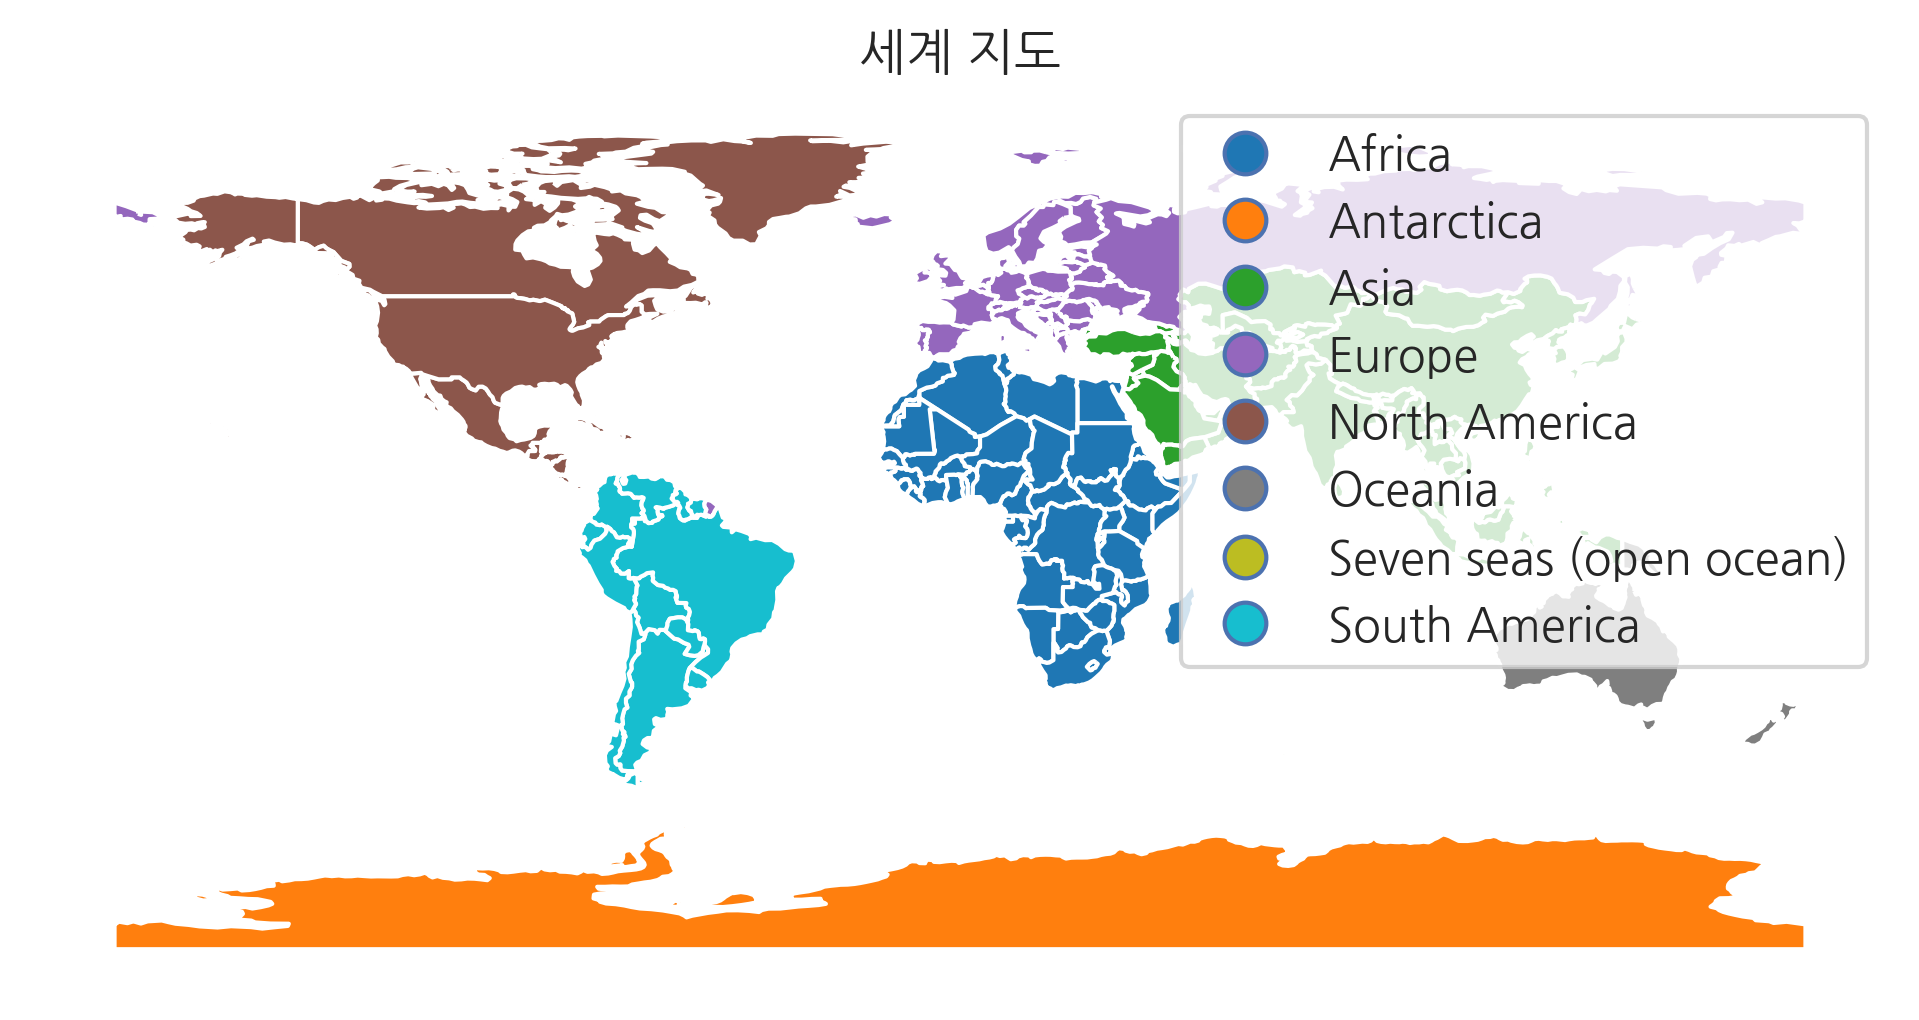

In [4]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

만약, 표현하고 싶은 컬럼이 실수 변수라면, 색을 변화시키는 기준 즉 데이터를 구분하는 방법과 갯수를 정의할 수 있다. 먼저 구분하는 방법은 `plot()`명령의 `scheme` 인자로 설정하는데, 지원하는 것으로는 "Equal_interval"(동일한 간격으로 구분), "Quantiles"(4분위수를 구하여 구분), "Fisher_Jenks"(클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분)가 있다. 구분하는 갯수는 `k` 인자에 원하는 숫자를 입력하면된다. 디폴트는 5이다.  

다음 코드는 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP를 만들고, 이를 지도에서 색으로 표현한 예이다. 

추가적으로, 정보를 색으로 나타낼 때는 표현하려는 정보에 따라, 컬러맵을 설정하는 것이 좋다. 이 예와 같이 수치적인 정보를 시각화 할 때는, 수치만큼 색이 밝고 어두워지는 것으로 표현하는 것이 더 적절하기 때문에 Sequence 계열의 컬러맵을 설정하는 것이 좋다. 컬러맵에 대해서는 이 곳을 참고하길 바란다.(https://matplotlib.org/users/colormaps.html)

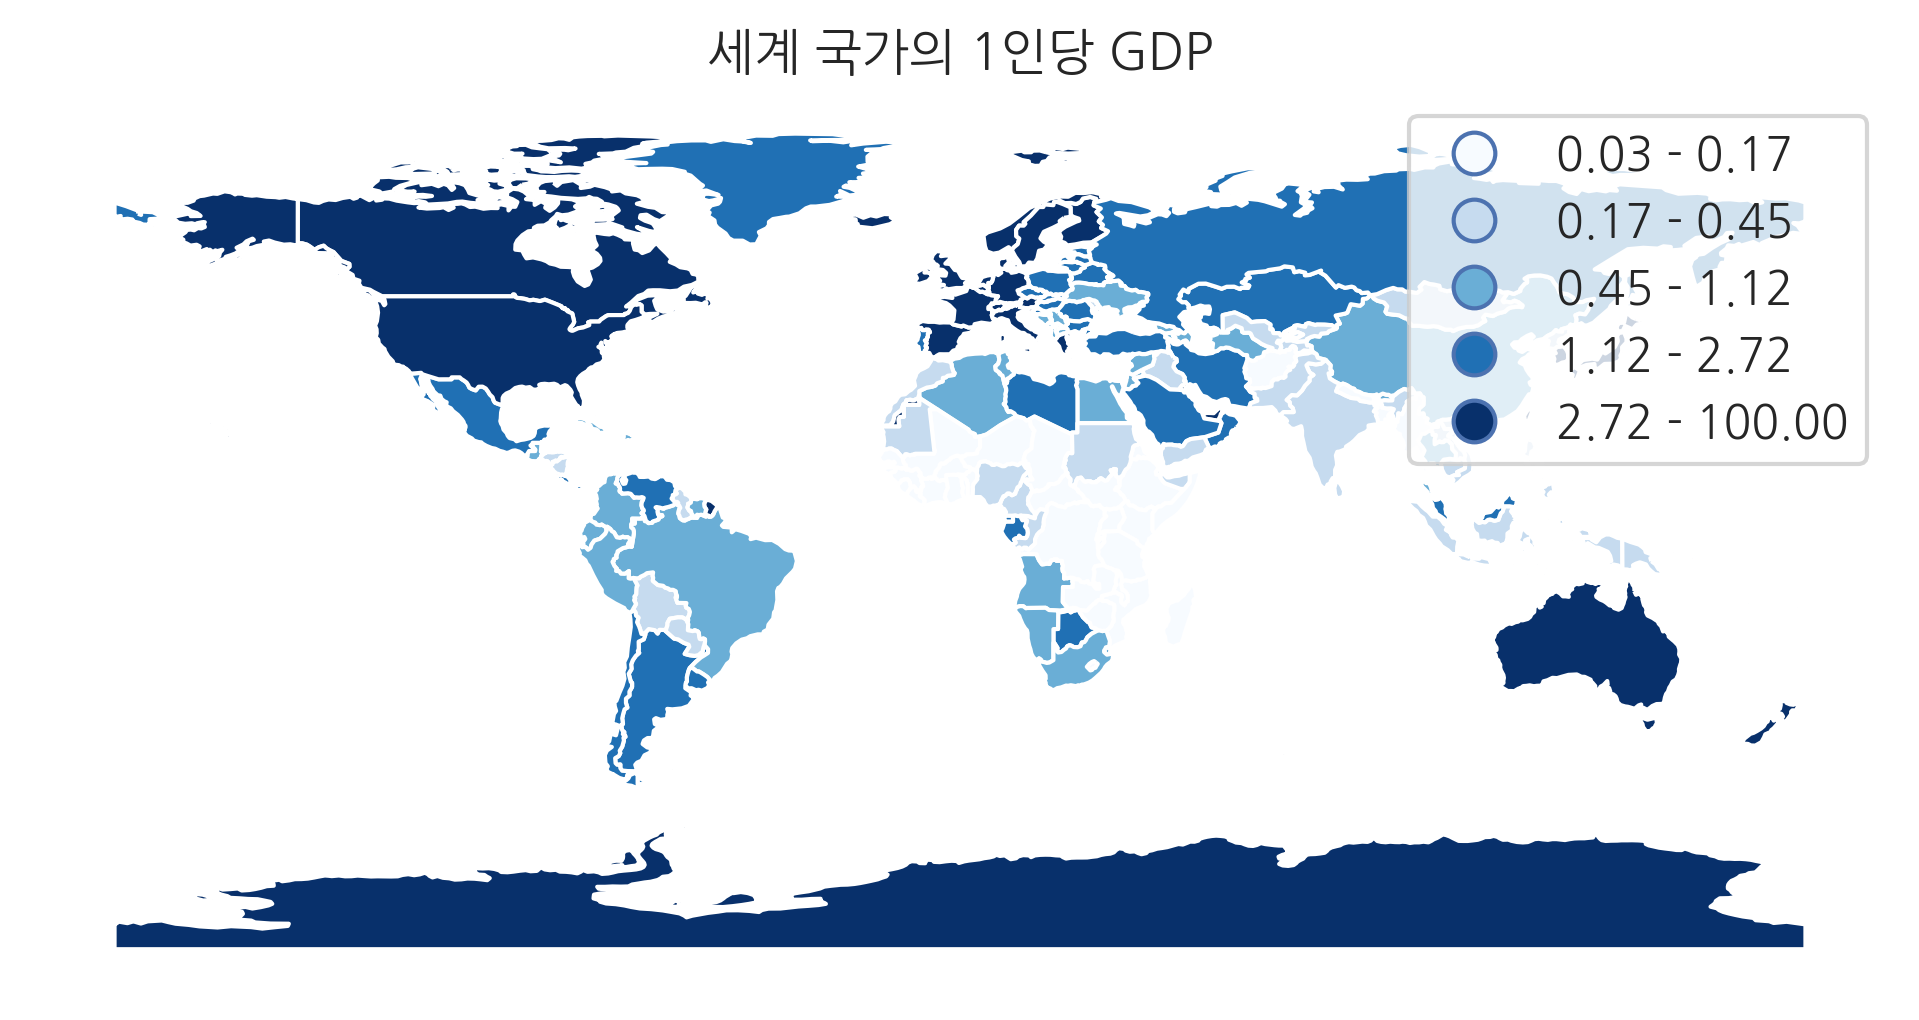

In [5]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

### Geometry 데이터

이전에 언급 했듯이, GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리한다. 여기서는 Geometry 데이터에 대해서 공부해보도록 하자. 

#### Polygons

한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다. "Countries" 데이터에서는 다음처럼 Polygon 데이터를 제공한다. 

In [6]:
countries.geom_type[:3]

0         Polygon
1    MultiPolygon
2         Polygon
dtype: object

In [7]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((165.7799898623264 -21.08000497811563, 166.5999914899338 -21.70001881275353, 167.1200114280869 -22.15999073658349, 166.7400346214448 -22.39997608814695, 166.1897322939687 -22.12970834726045, 165.4743754417522 -21.67960662199823, 164.8298153017757 -21.14981983814195, 164.1679952334136 -20.44474659595163, 164.029605747736 -20.10564584725235, 164.4599670758627 -20.1200118954295, 165.0200362490421 -20.45999114347773, 165.4600093935751 -20.80002206795826, 165.7799898623264 -21.08000497811563))


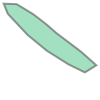

In [8]:
countries.geometry[113]

#### Points 

어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다. "Cities" 데이터에서는 도시를 하나의 점으로 나타내었다. 이 점을 다음처럼 지도위에 표현 할 수 있다. 

In [9]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

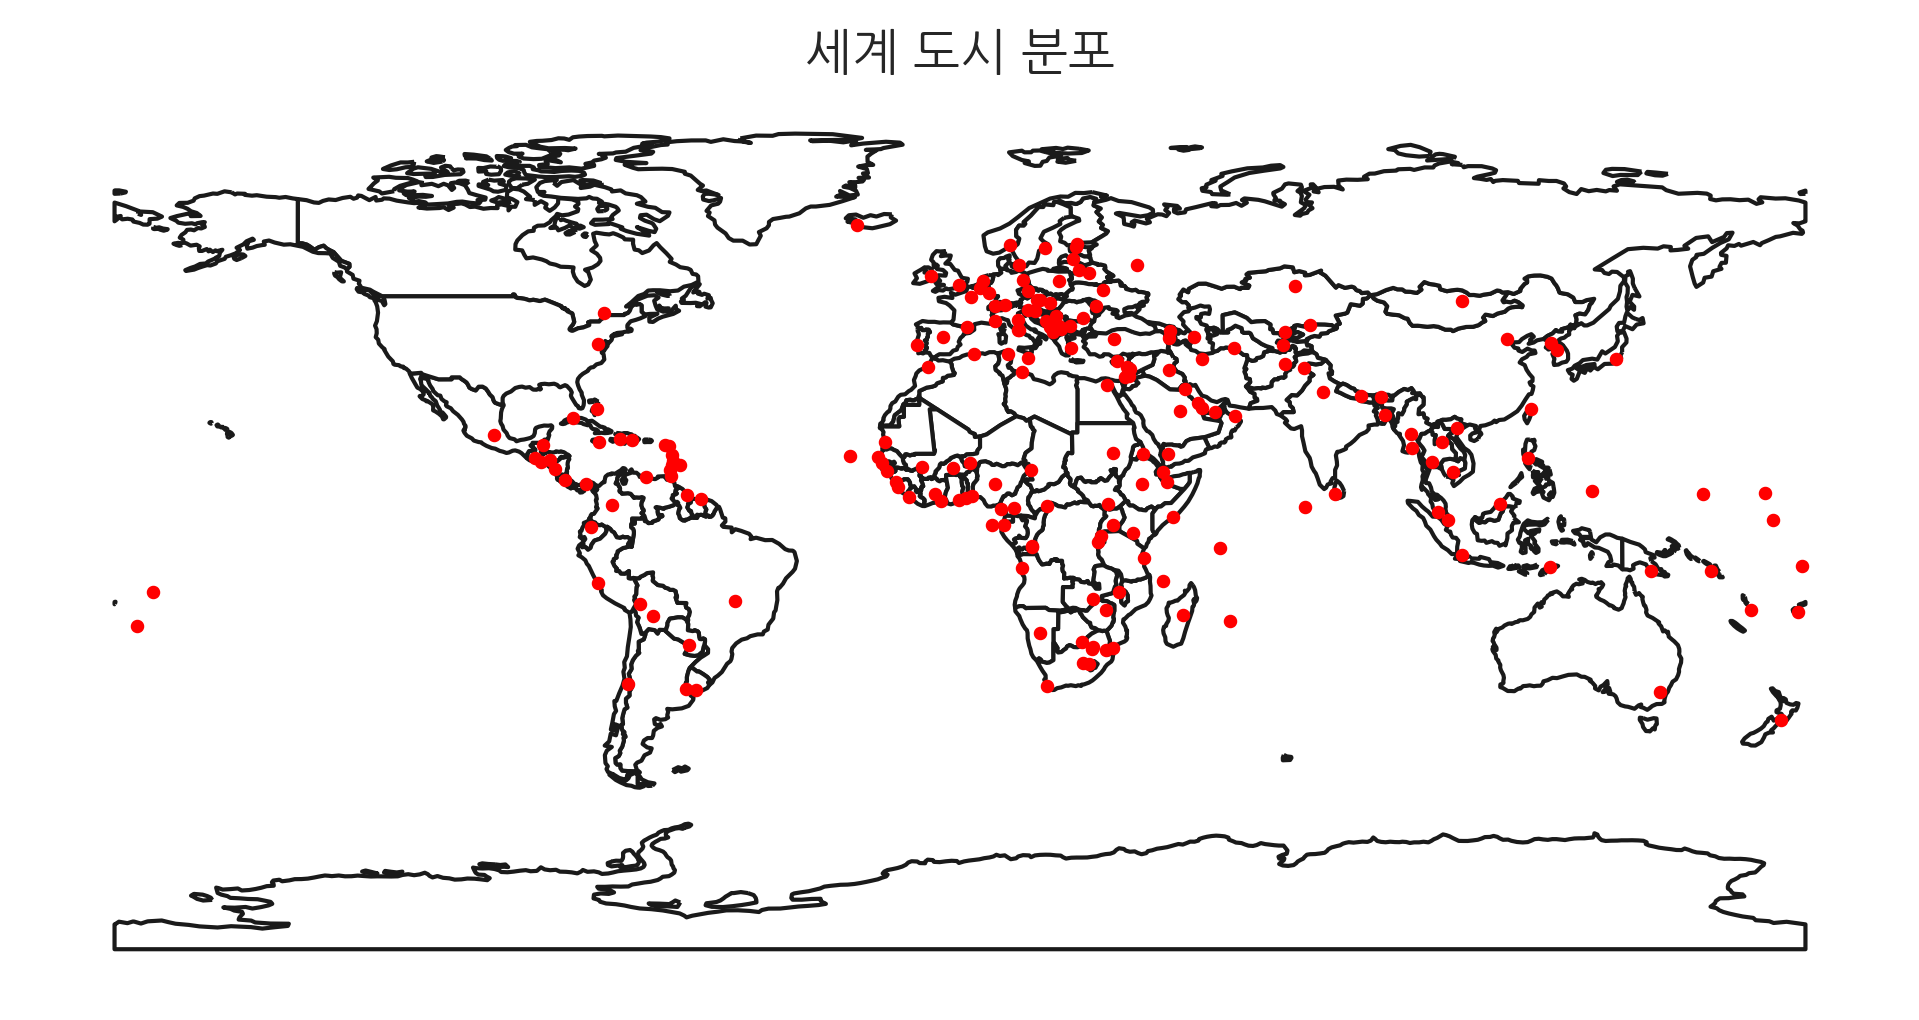

In [10]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

#### LineString 

점과 점을 이은 것은 선이 된다. 두 도시 사이의 길, 강의 흐름, 국경의 생김새, 경계면 정보 등을 선으로 나타낼 수 있겠다. 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다.  여기서 사용되는 `squeeze()`함수는 GeoPandas 객체에서 Geometry 데이터 만을 추출해주는 기능을 한다. `boundary` 속성에 대해서는 다음 단락에서 학습 하겠다. 

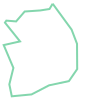

In [11]:
korea_border = countries[countries.name == "Korea"].geometry
# 버전 6.x에서는 "South Korea"를 사용해야 함

korea_border.boundary.squeeze()

#### Geometry 데이터의 속성

Geometry 타입의 데이터는 다음과 같은 속성을 가지고 있다. 

- 지리정보의 속성 ( 아래의 속성값은 Point 데이터에서는 모두 0이다. ) 
  - `area` : 넓이 
  - `boundary` : 테두리 
  - `centroid` : 중앙지점 

그리고 두 Geometry 간의 거리를 계산 해주는 함수 또한 유용하게 사용된다. 
- `distance` : 두 점사이의 거리

넓이, 거리는 우리가 흔히 사용하는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다. 그래서 같은 객체 안에서의 비교만 가능하다. 

### GeoPandas의 지리 데이터 간의 관계 연산

GeoPandas는 지리데이터 간의 관계를 연산해주는 기능을 가지고 있다. 관계를 연산한다는 말은, 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다. 

좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용해, 어떤 도시가 어느 나라 안에 있는지, 도시끼리의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계를 알 수 있다. 

#### 관계 연산 예제

지리적 관계에 대한 경우의 수는 매우 많기 때문에, 간단한 예제를 통해 기본적인 관계연산을 학습해 보겠다. 

먼저, 동북아시아의 주요 국가와 도시를 각 각 선과 점으로 나타내고, 도시들을 이어 주었다.

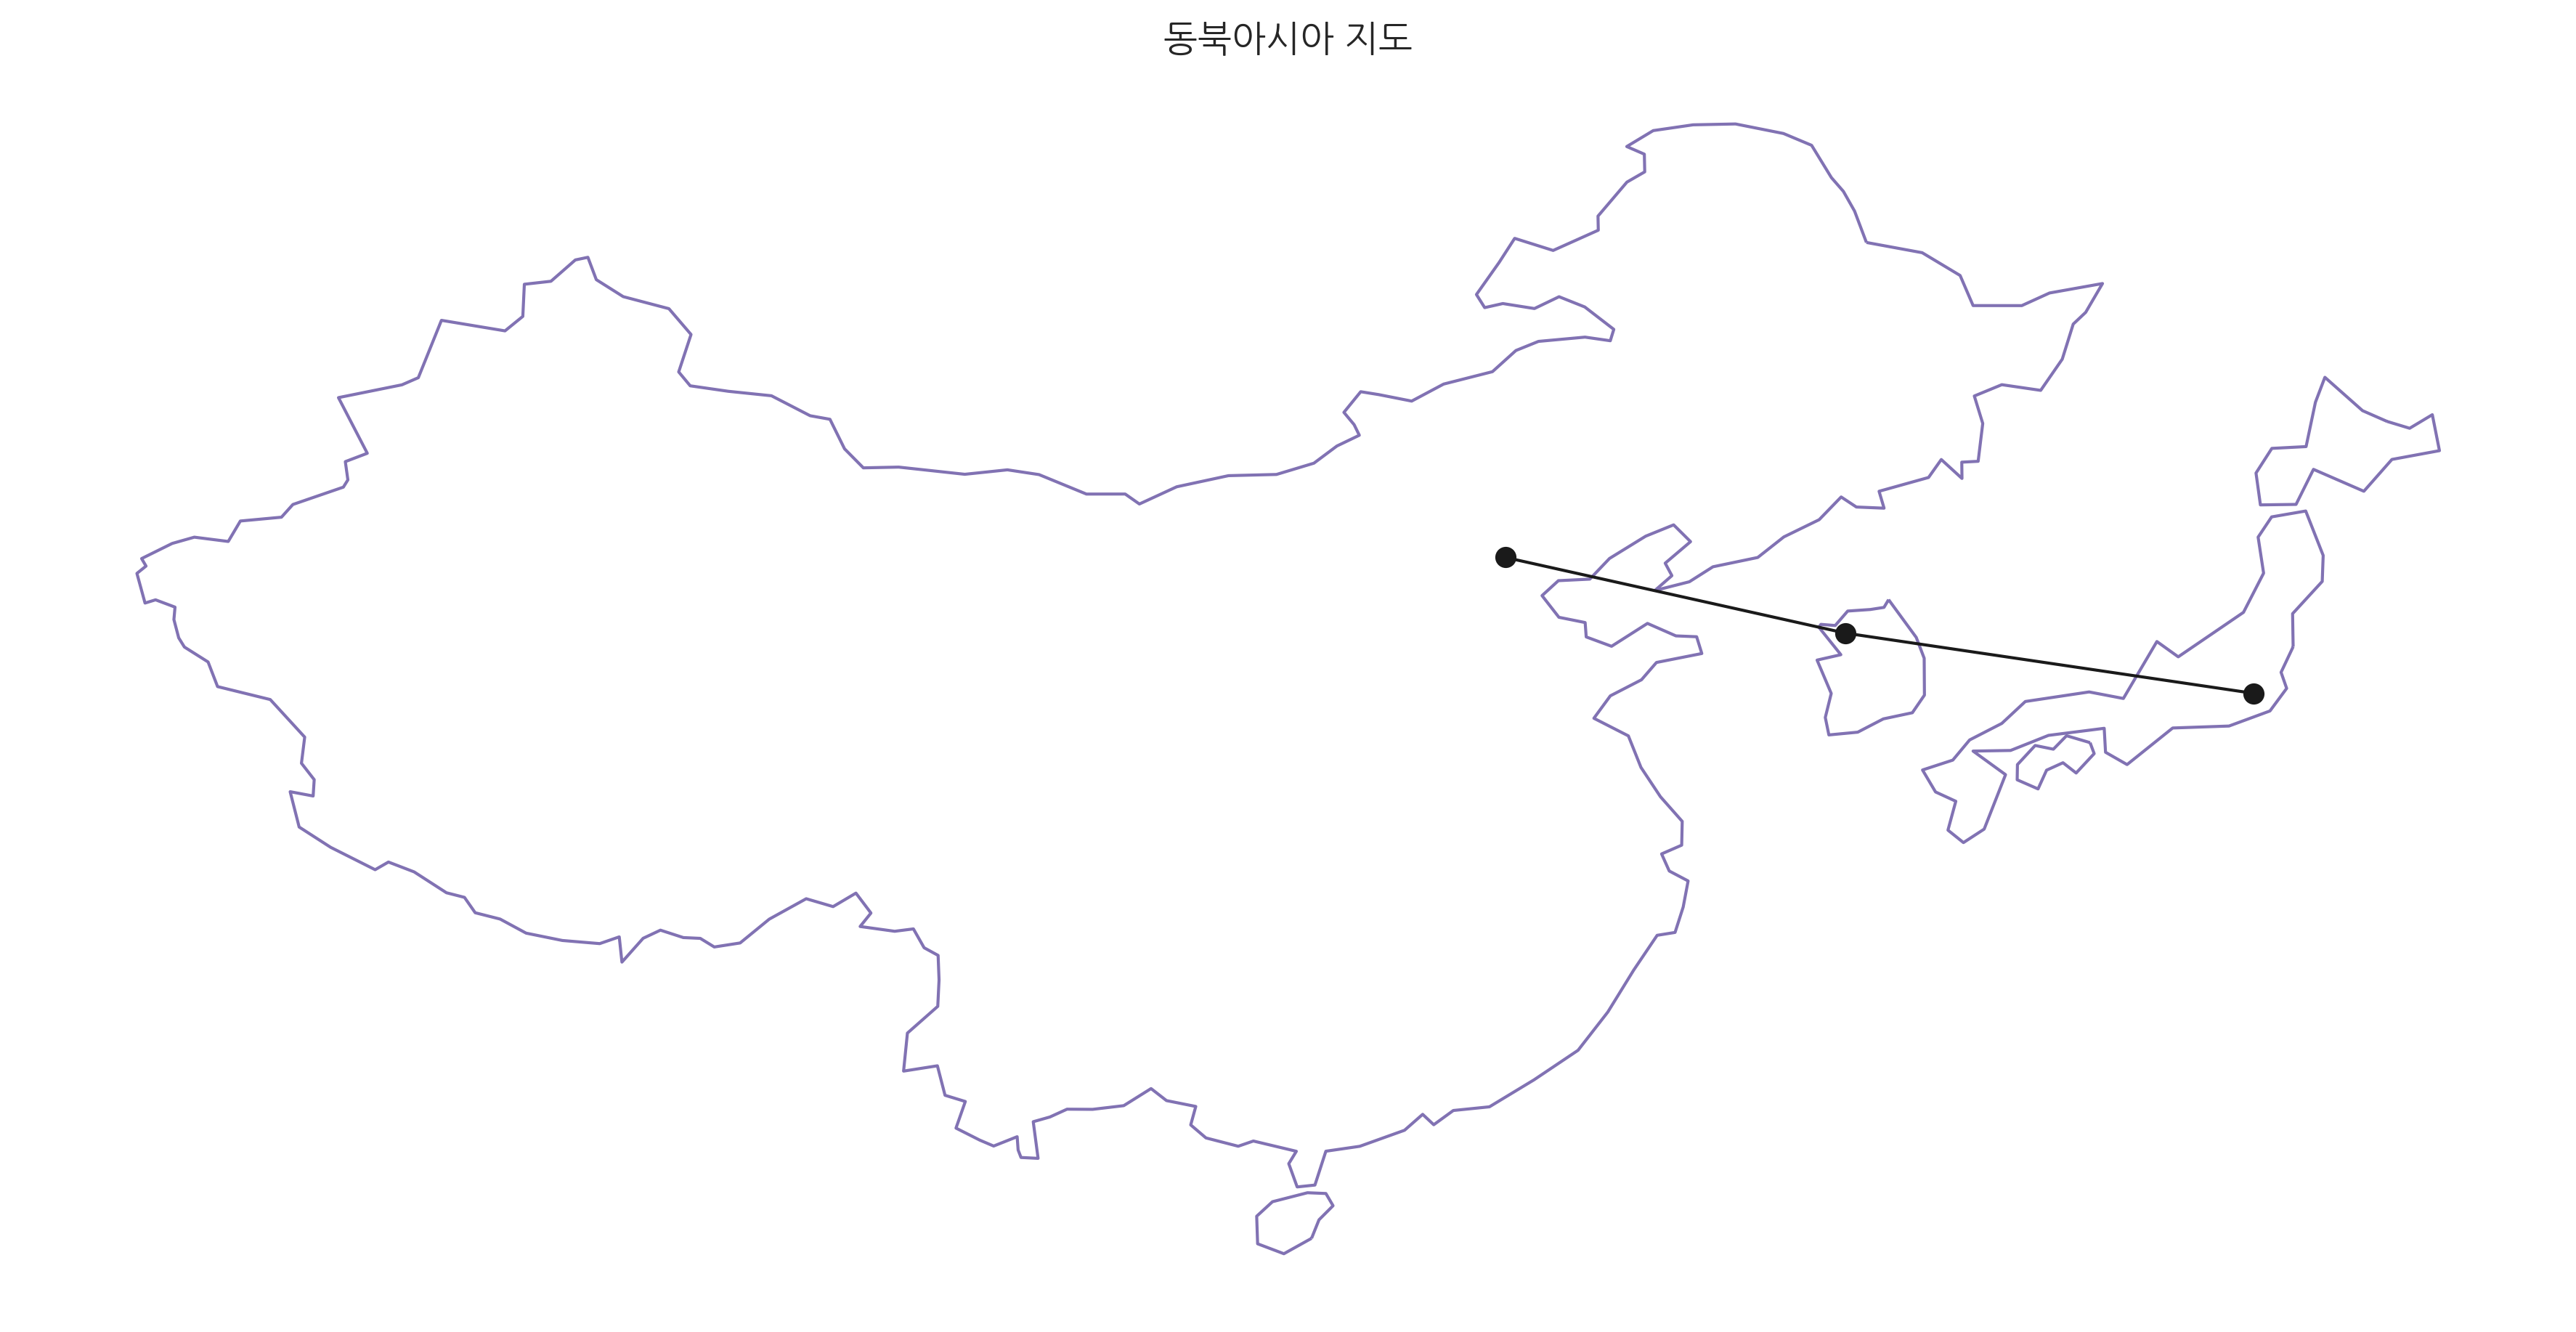

In [12]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

다음은 기본적인 관계 연산 함수들이다. 관계연산의 출력값은 부울리언 값이다. 
* 기본 관계 연산
  - `within` : 지리적으로 포함되는지 여부
  - `contains` : 지리적으로 포함하고 있는지 여부
  - `intersects` : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환
  - `crosses` : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다. 

In [13]:
korea = countries.loc[countries['name'] == 'Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

서울은 한국 안에 있다. 

In [14]:
seoul.within(korea)

True

한국은 서울을 포함 하고 있다. 

In [15]:
korea.contains(seoul)

True

중국과 한국의 국경은 맞닿아 있지 않다.

In [16]:
china.intersects(korea)

False

홍콩, 베이징, 토쿄, 서울을 잇는 선은 한국을 지나 간다.

In [17]:
line.crosses(korea)

True

위와 같은 간단한 관계연산을 이용하면 데이터 검색 또한 가능하다. 

In [18]:
countries[countries.crosses(line)]

pop_est continent             name iso_a3  gdp_md_est  \
30   1.338613e+09      Asia            China    CHN   7973000.0   
82   1.270787e+08      Asia            Japan    JPN   4329000.0   
87   4.850897e+07      Asia            Korea    KOR   1335000.0   
129  2.266534e+07      Asia  Dem. Rep. Korea    PRK     40000.0   

                                              geometry  gdp_per_cap  
30   (POLYGON ((110.3391878601516 18.67839508714761...     0.595617  
82   (POLYGON ((134.6384281760039 34.14923371025642...     3.406551  
87   POLYGON ((128.3497164246766 38.61224294692785,...     2.752068  
129  POLYGON ((130.6400159038524 42.39500946712528,...     0.176481

#### 속성을 이용한 연산

서울에서 베이징까지의 거리

In [19]:
seoul.distance(beijing)

10.871264032732043

한국으로 부터 서울과 베이징 간의 거리 보다 가까운 데이터를 찾는다. 

In [20]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

pop_est continent             name iso_a3  gdp_md_est  \
30   1.338613e+09      Asia            China    CHN   7973000.0   
82   1.270787e+08      Asia            Japan    JPN   4329000.0   
87   4.850897e+07      Asia            Korea    KOR   1335000.0   
129  2.266534e+07      Asia  Dem. Rep. Korea    PRK     40000.0   
135  1.400412e+08    Europe           Russia    RUS   2266000.0   

                                              geometry  gdp_per_cap  
30   (POLYGON ((110.3391878601516 18.67839508714761...     0.595617  
82   (POLYGON ((134.6384281760039 34.14923371025642...     3.406551  
87   POLYGON ((128.3497164246766 38.61224294692785,...     2.752068  
129  POLYGON ((130.6400159038524 42.39500946712528,...     0.176481  
135  (POLYGON ((143.6480074403629 50.74760040954152...     1.618095

한국의 면적 과 중국 면적의 비율

In [21]:
china.area / korea.area

95.89681432460839

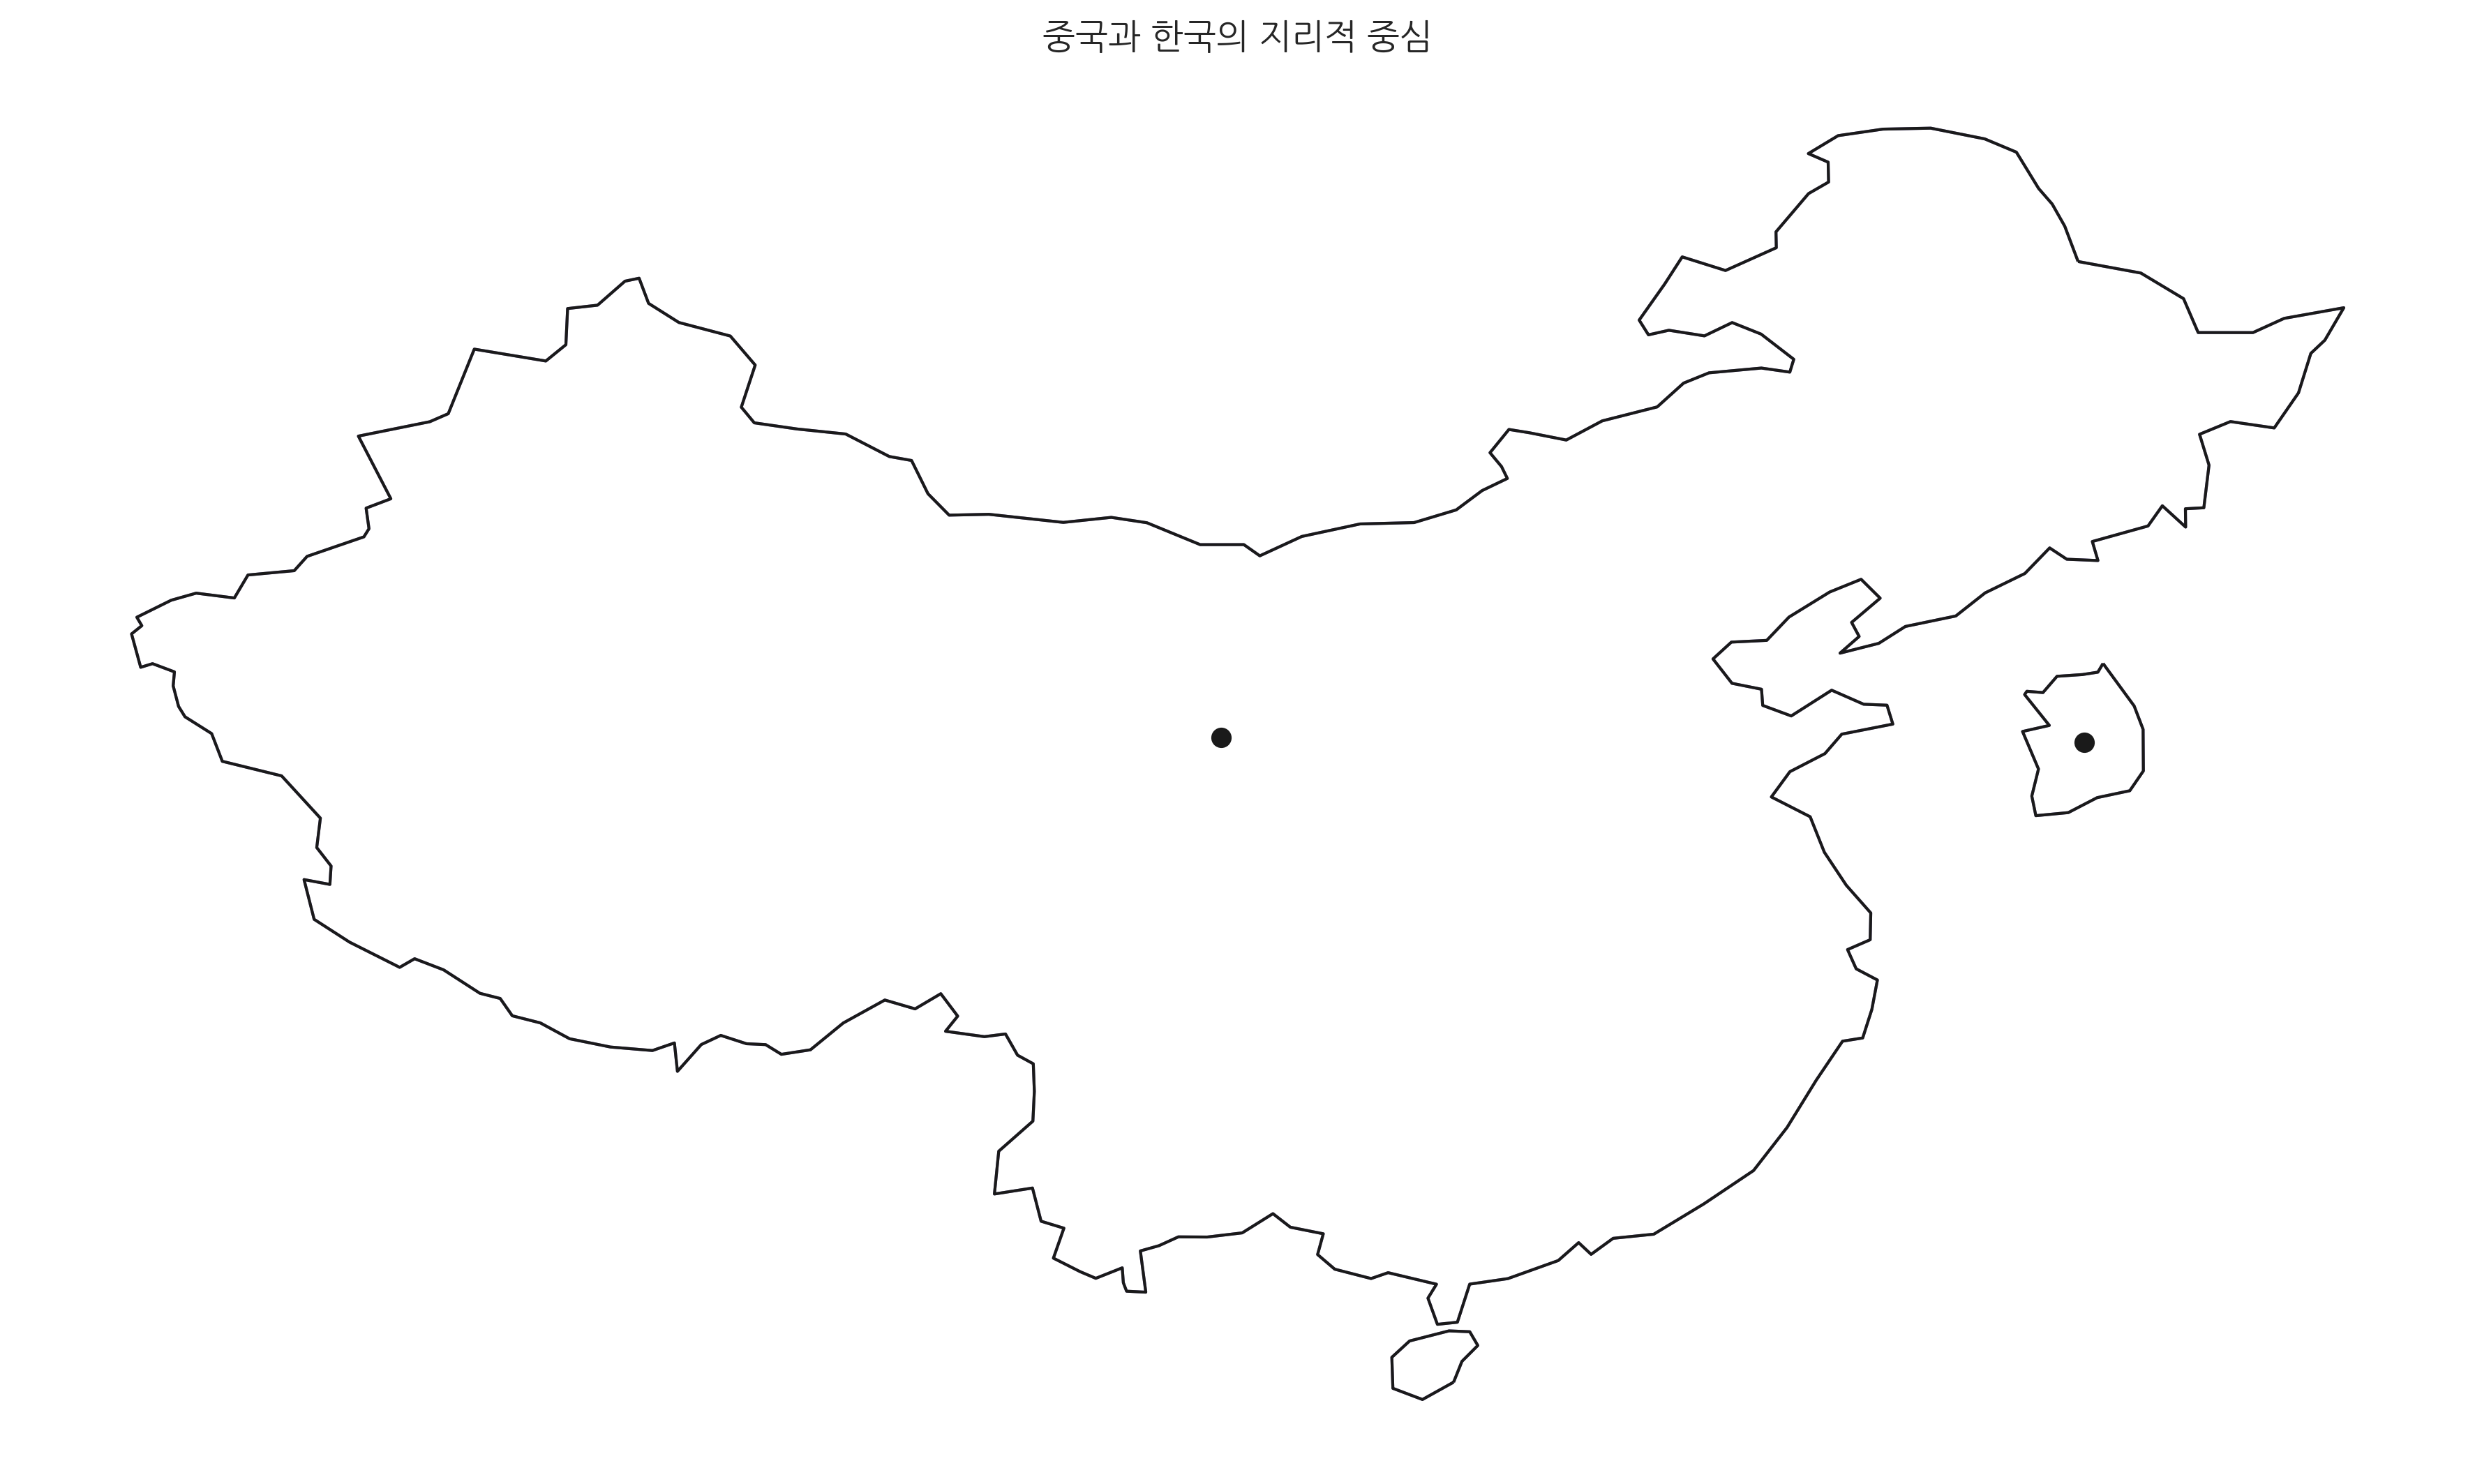

In [22]:
base = northern_asia[northern_asia.name != "Japan"].plot(
    figsize=(15, 15), color="w", edgecolor="m")
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid,
                    korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("중국과 한국의 지리적 중심")
ax.set_axis_off()
plt.show()

### 지리 정보 조작

이번에는 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제를 만들었다. 

데이터는 아래의 링크에서 다운로드 할 수 있다.
- http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin

다운로드 받은 파일의 압축을 풀면, 다음과 같은 파일 구조를 확인 할 수 있다. 

```
.                                                                                                                                                                                                           
├── 강원도                                                                                                            │   ├── TL_KODIS_BAS_42.dbf                                                                                         │   ├── TL_KODIS_BAS_42.shp                                                                                         │   └── TL_KODIS_BAS_42.shx                                                                                         ├── 경기도                                                                                                             │   ├── TL_KODIS_BAS_41.dbf                                                                                         │   ├── TL_KODIS_BAS_41.shp                                                                                         │   └── TL_KODIS_BAS_41.shx 
.
.
.
```

각 지역 마다 폴더가 나뉘어져 있다. 그 중 우리는 `서울특별시` 데이터를 사용한다. 서울특별시 폴더 안의 파일은 총 3개로, 각 파일의 확장자는 .dbf, .shx, .shp 이다. 이 중 .shp 확장자를 가진 파일을 불러 올 것이다. 

* shape file 이란 ?

> .shp, .shx, .dbf 3개의 파일을 합쳐서 shape file 이라고 한다. shpae file은 GIS에서 사용하는 벡터 형식의 데이터 이다. 
> - .shp : 점, 다각형 등의 지리정보를 담고 있다. 이 때 지리정보의 타입은 혼용되지 않는다. 점과 다각형이 같은 파일에 저장 될 수 없다는 뜻이다. 
> - .shx : 지리정보의 인덱스 정보를 담고 있다. 
> - .dbf : 지리정보의 속성 정보를 담고 있다. 


.shp 파일은 나머지 .dbf, .shx 파일이 없으면 불러올 수 없다. 그리고 "GRS80_UTMK.prj"는 데이터가 사용하는 좌표계 정보가 들어있다. 이 부분은 바로 다음 단락에서 학습할 것이다. 결과적으로 총 4가지 파일이 모두 한 곳에 있도록 한다. 

각 열의 의미는 다음과 같다. 
 - BAS_MGT_SN : 기초구역 관리번호
 - CTP_KOR_NM : 시도명
 - SIG_CD : 시군구코드
 - SIG_KOR_NM : 시군구명
 - BAS_ID : 기초구역번호 본번
 - BAS_AR :  기초구역 면적(km²)
 - NTFC_DE : 고시일자
 - MVMN_DE : 이동일자
 - MVMN_RESN : 이동사유
 - OPERT_DE : 작업일시

In [23]:
seoul_file = "./geodata/서울특별시/TL_KODIS_BAS_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

BAS_MGT_SN CTP_KOR_NM SIG_CD SIG_KOR_NM BAS_ID  BAS_AR   NTFC_DE  \
5662  1129000046      서울특별시  11290        성북구  02851   0.052  20121221   
5663  1129000047      서울특별시  11290        성북구  02822   1.087  20121221   
5664  1129000068      서울특별시  11290        성북구  02838   0.126  20121221   

       MVMN_DE    MVMN_RESN        OPERT_DE  \
5662  20121221  국가기초구역 최초생성  20121221000000   
5663  20121221  국가기초구역 최초생성  20121221000000   
5664  20121221  국가기초구역 최초생성  20121221000000   

                                               geometry  
5662  POLYGON ((957702.9099090951 1954159.860729071,...  
5663  POLYGON ((954675.9156118908 1956603.959798415,...  
5664  POLYGON ((955414.3235739921 1955463.202727248,...

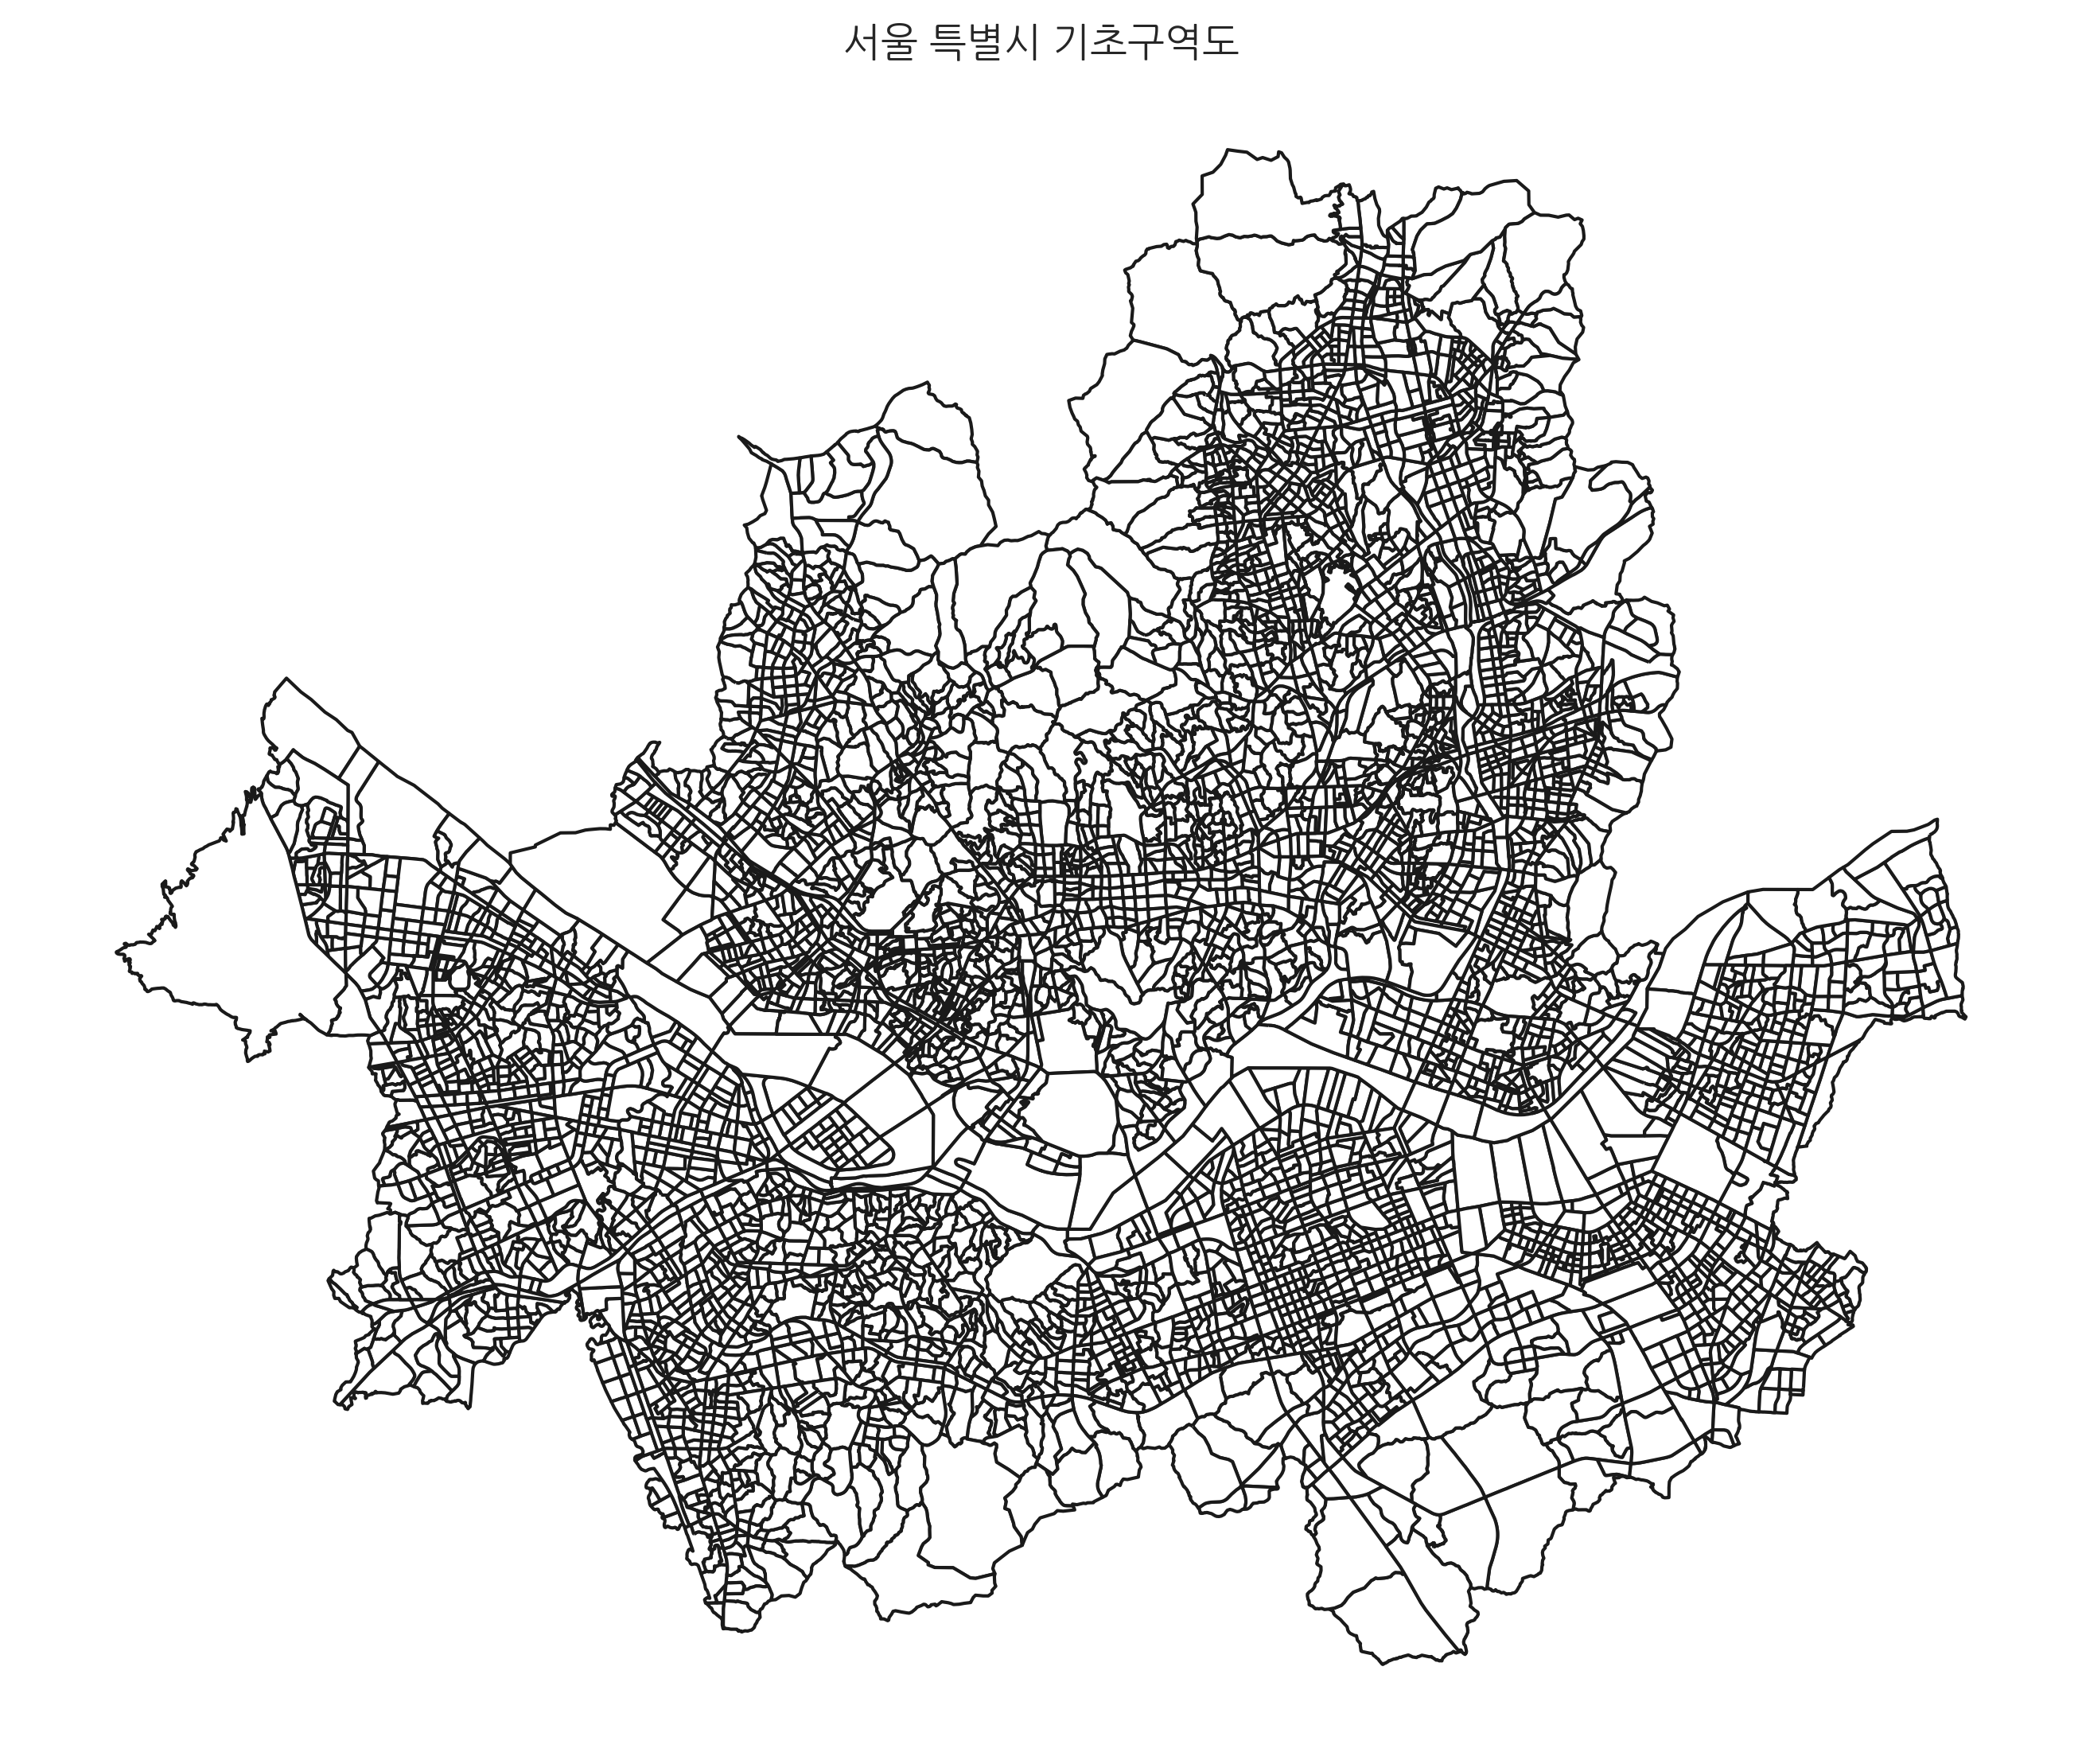

In [24]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("서울 특별시 기초구역도")
ax.set_axis_off()
plt.show()

다음 나열된 함수들은 지리정보를 변환하는 기능을 가진다. 

* `convex_hull`
 - Polygon 데이터의 convex hull을 그린다. 

* `envelope` 
 - Polygon 데이터를 감싸는 가장 작은 사각형을 그린다. 

* `simplify`(tolerance, preserve_topology=True)
 - Polygon 데이터에 대해 컨투어 추정을 한다.

* `buffer`(distance, resolution=16)
 - Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만들고, Polygon에 적용하면 주어진 거리만큼 확장한다. 

* `unary_union`
 - 여러 개의 geometry 데이터의 합집합을 구한다. 
 - Polygon 내에 빈 곳이 있는 경우, unary_union가 실행 되지 않는다. 이 때는 buffer() 명령으로 Polygon의 빈 곳을 채워준 후 사용한다. 

다음 코드는 동작구의 기초 구역도를 convex_hull, envelope, unary_union을 이용해 변환하는 예이다. 

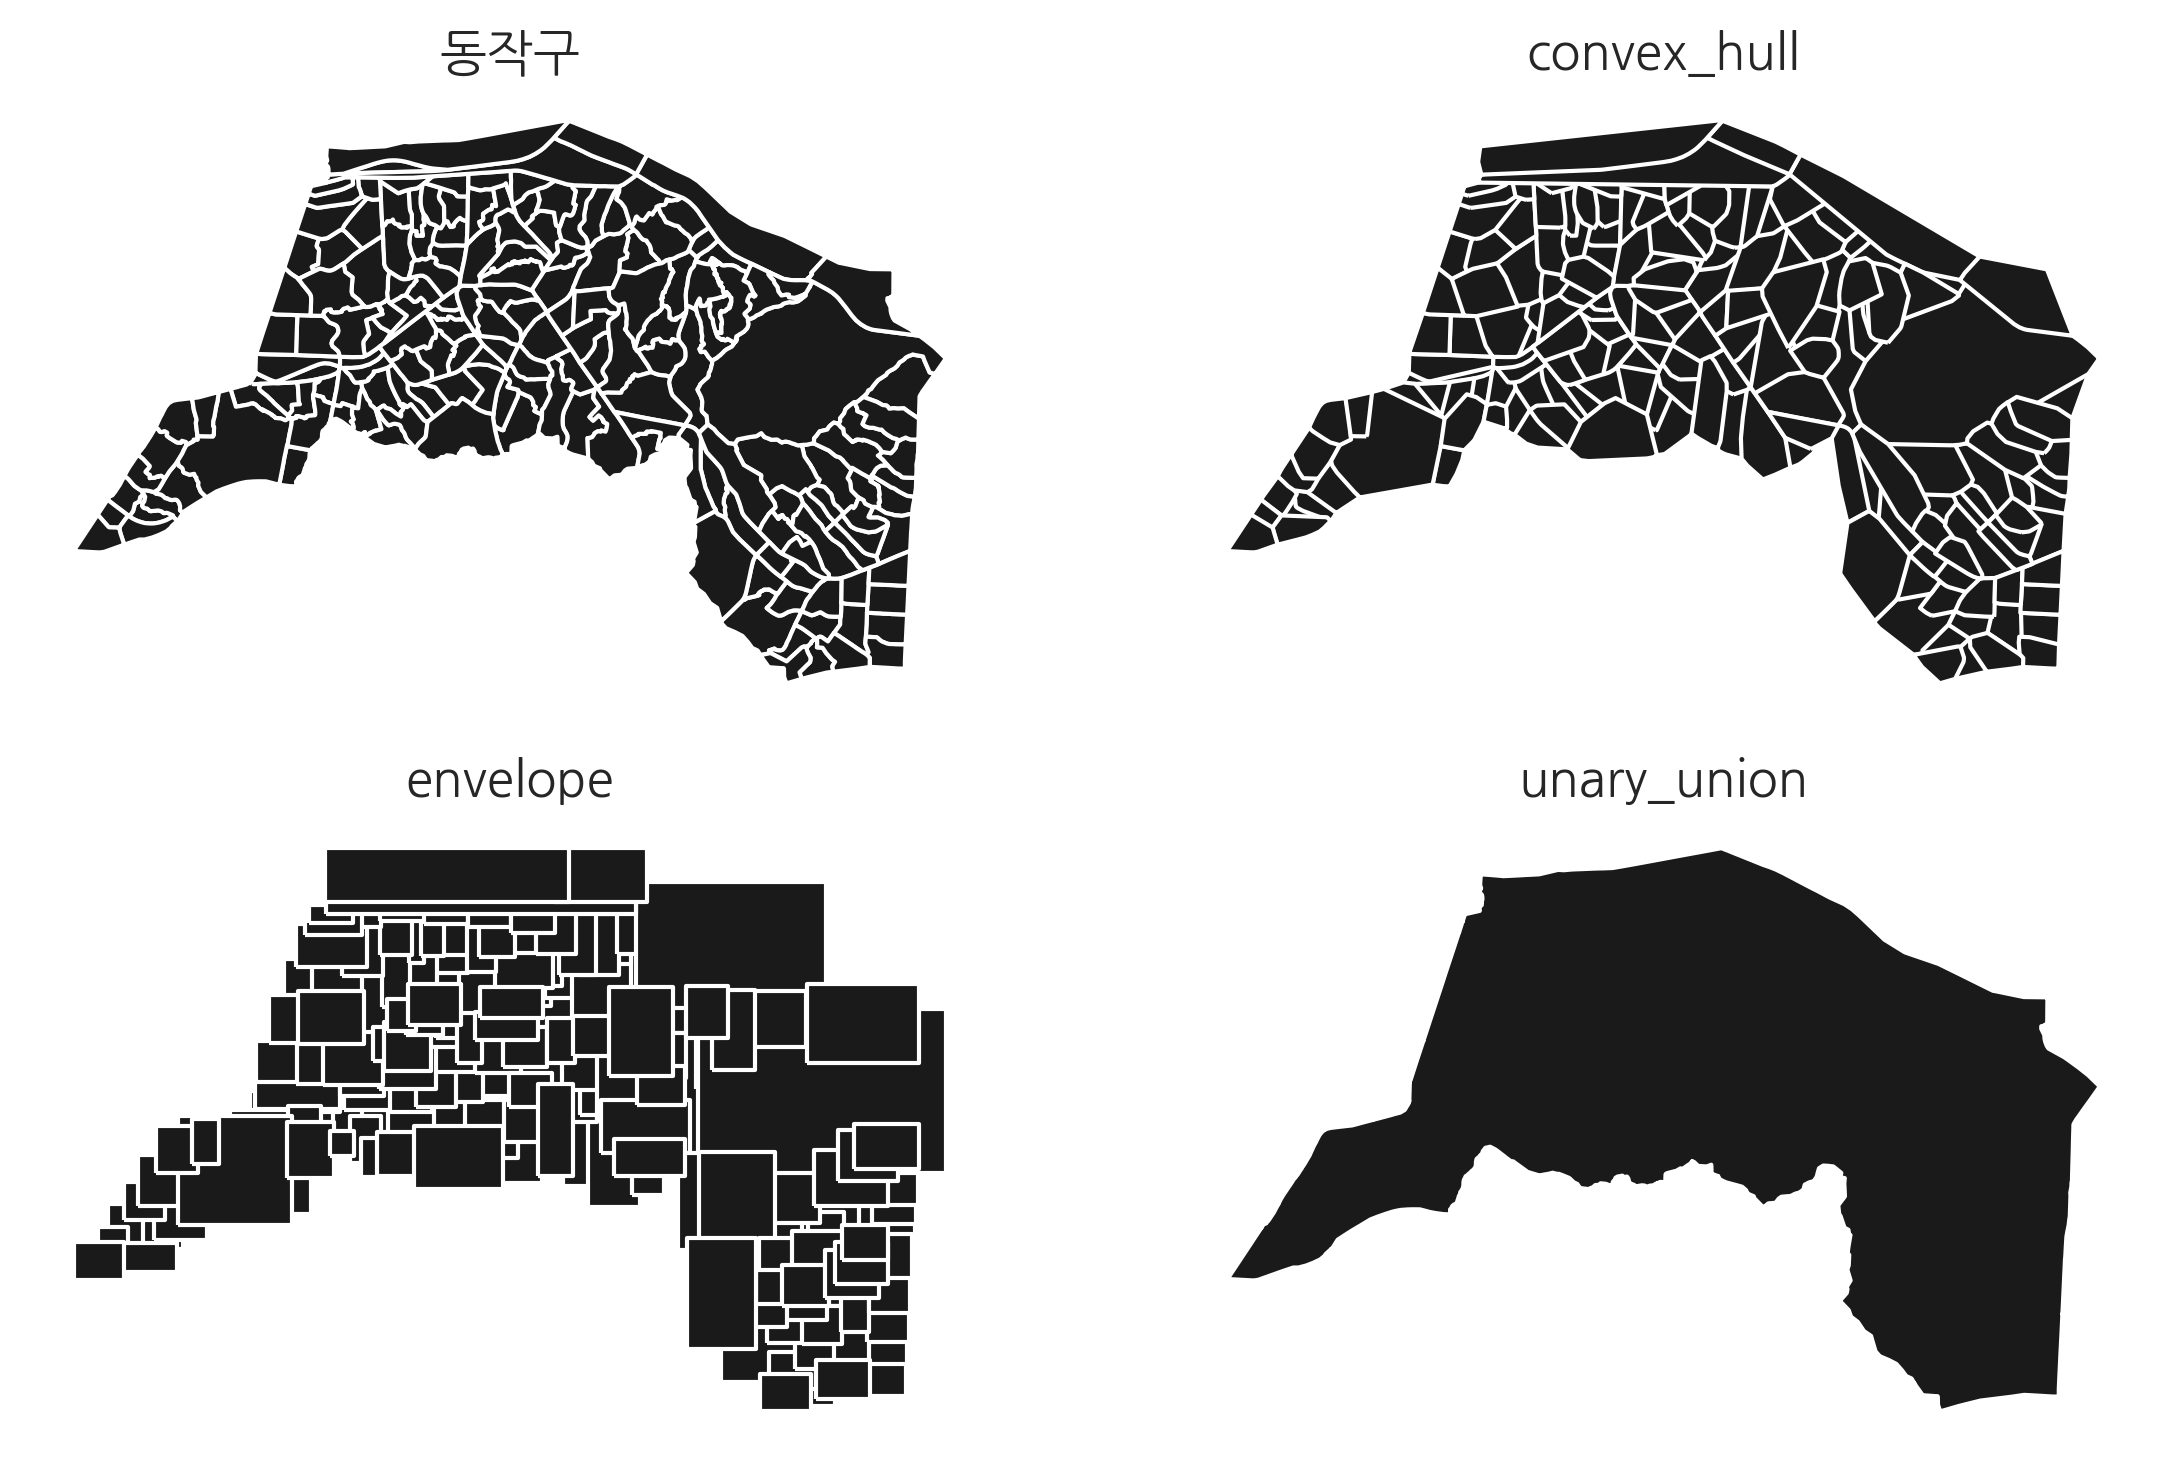

In [25]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공한다. 

* **Dissolve**
 - GeoDataFrame 내의 geometry를 그룹 별로 unary_union를 이용해 geometry 데이터를 합친다. 

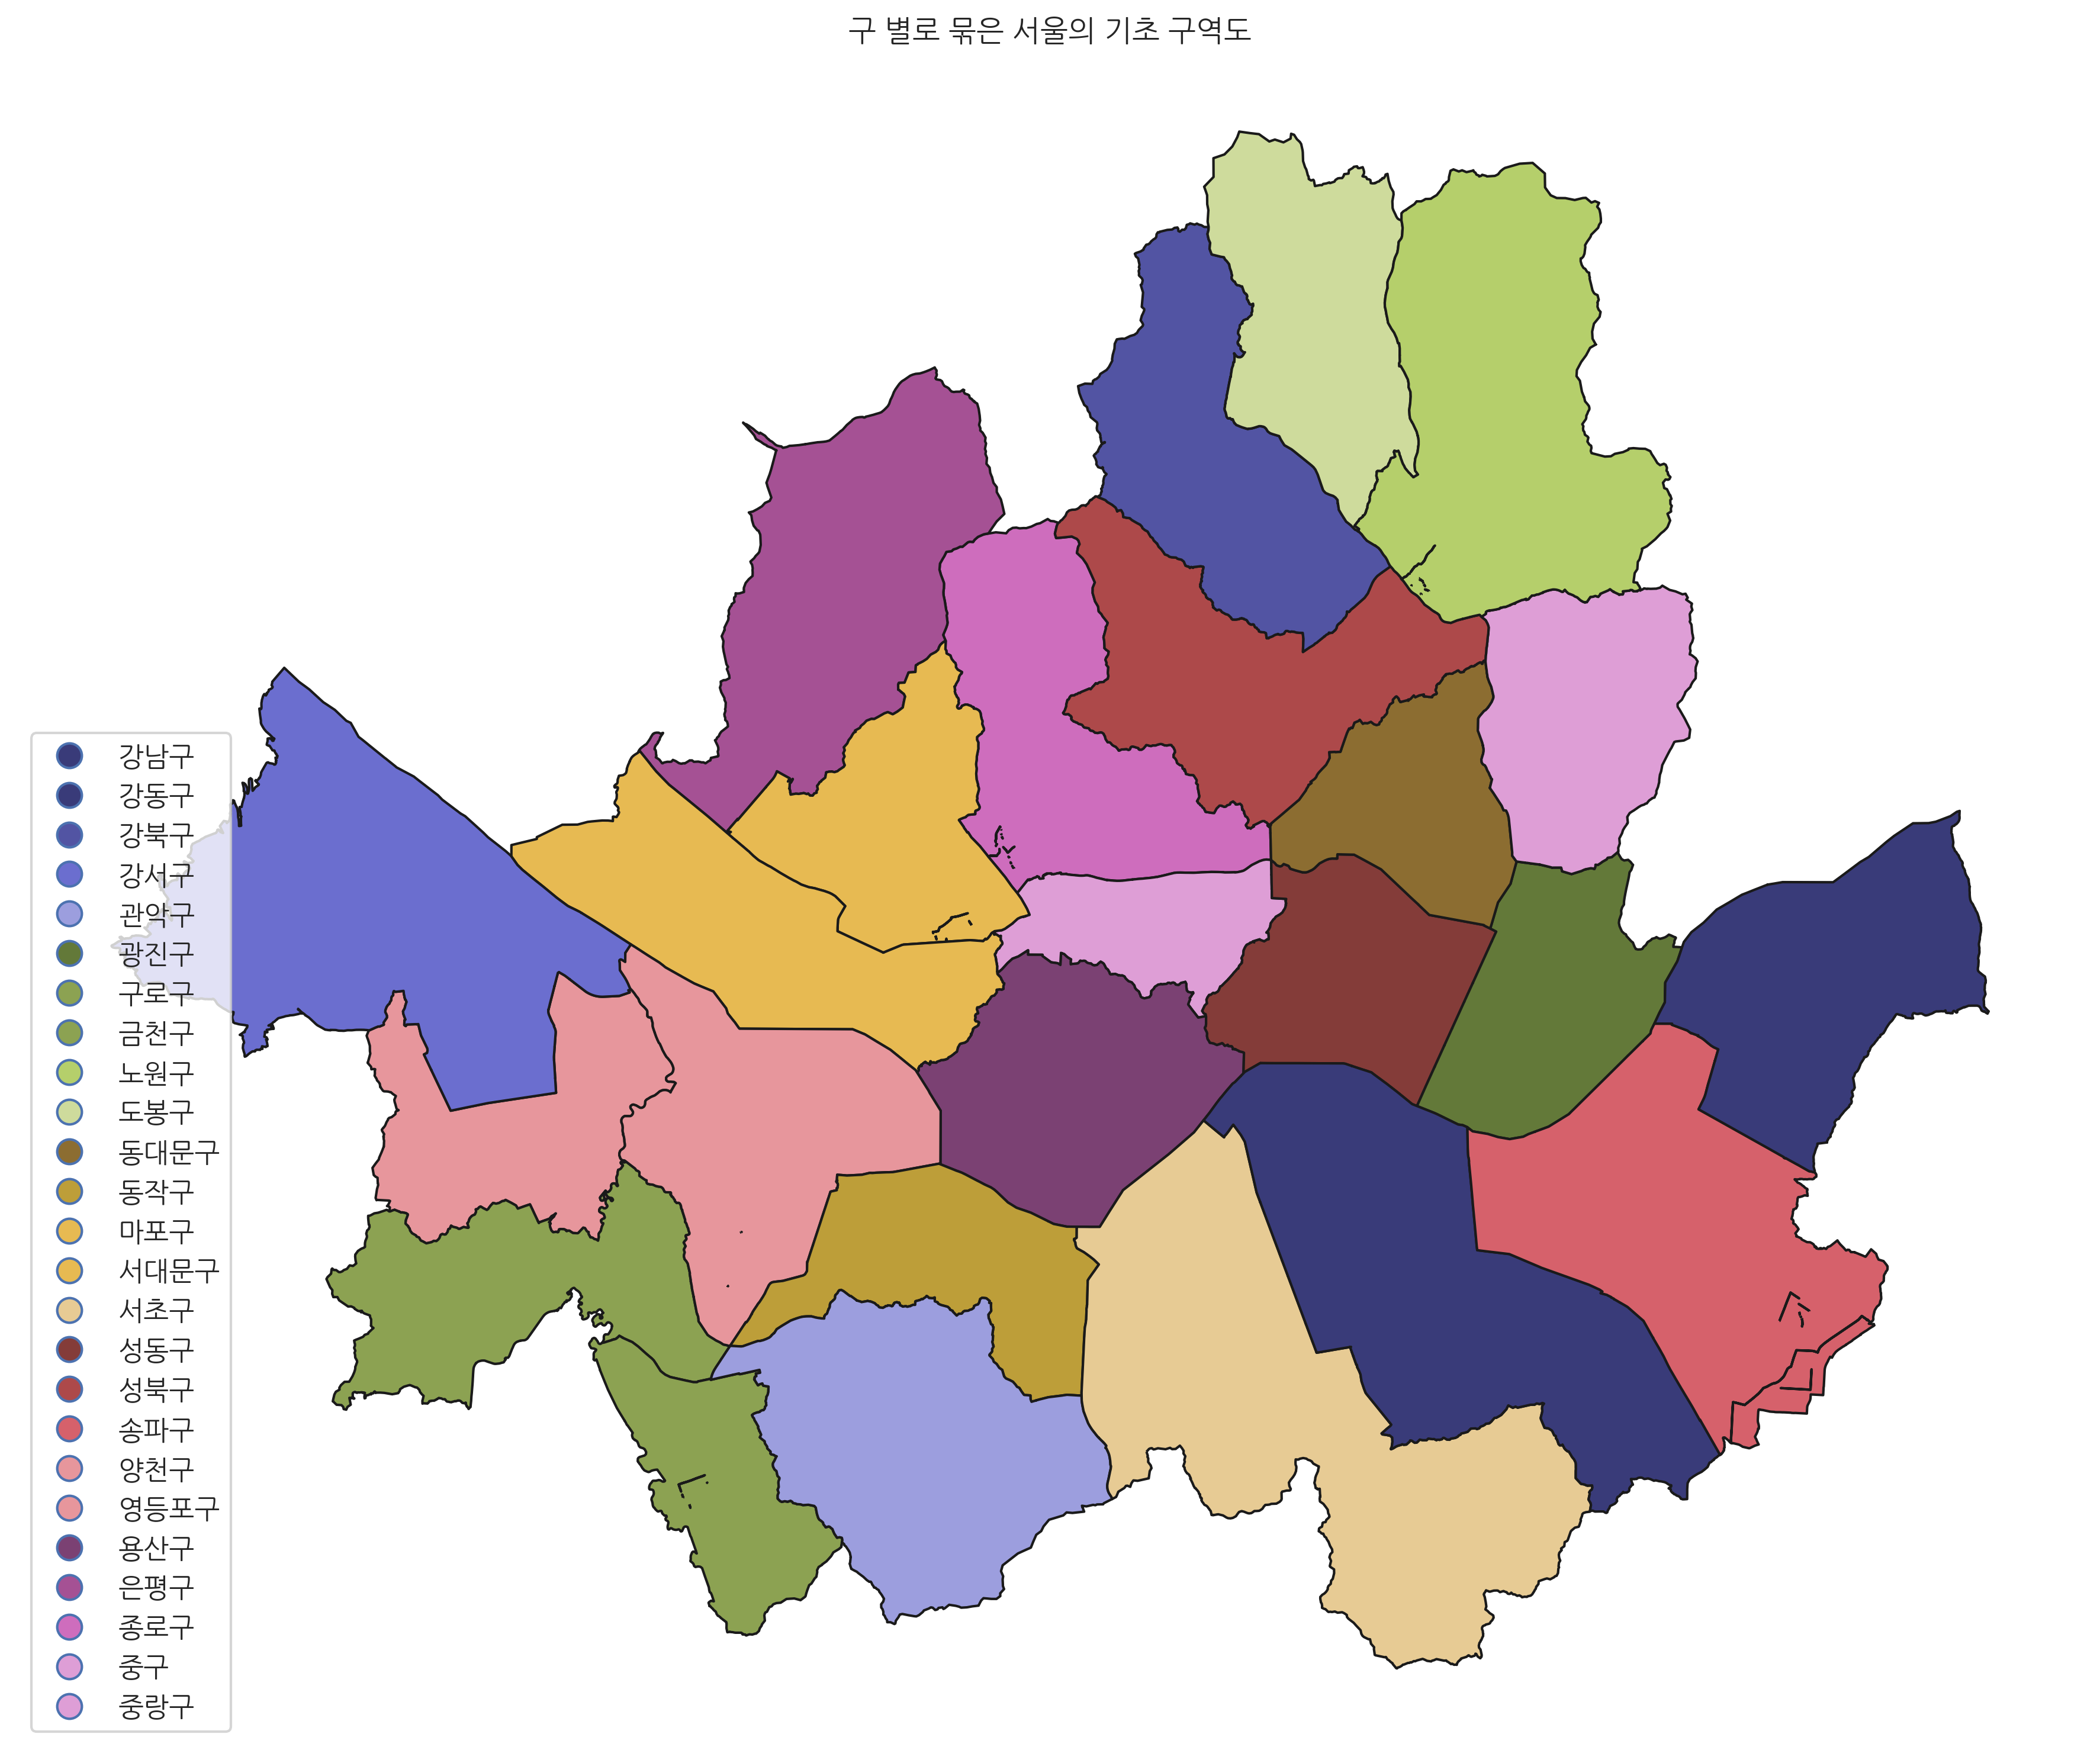

In [26]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()

## GeoPandas의 좌표계

#### 좌표계 (Coordinate reference systems)

`좌표계(CRS)` 는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다. GeoPandas 데이터라면, `crs` 속성값으로 확인 할 수 있다. 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일 시켜주어야 한다. 잘 사용되는 좌표계는 다음과 같다.

* WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)
* Bessel 1841(EPSG:4004): 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
* GRS80 UTM-K(EPSG:5179): 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계. 네이버 지도
* GRS80 중부원점(EPSG:5181): 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계. 다음카카오 지도
* Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계
* Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

GeoPandas는 좌표계 변환 기능을 `to_crs()`라는 함수로 제공한다. 다음 코드는 "epsg:4326" 에서 "epsg:3857"로 변환한다. 
다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다. "epsg:3857", Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만, 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [27]:
countries.crs

{'init': 'epsg:4326'}

In [28]:
# 이전의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((18454544.05518823 -2401420.887459434, 18545826.21882315 -2475546.787735221, 18603714.5735407 -2530744.901528734, 18561415.74891204 -2559615.380407254, 18500156.37403505 -2527105.410038833, 18420523.21351083 -2473101.37355341, 18348771.106943 -2409751.994917226, 18275097.63393617 -2325792.363960424, 18259692.18685939 -2285550.336408644, 18307599.79076358 -2287253.416006154, 18369946.40593091 -2327603.551034443, 18418923.99234304 -2368049.267481055, 18454544.05518823 -2401420.887459434))


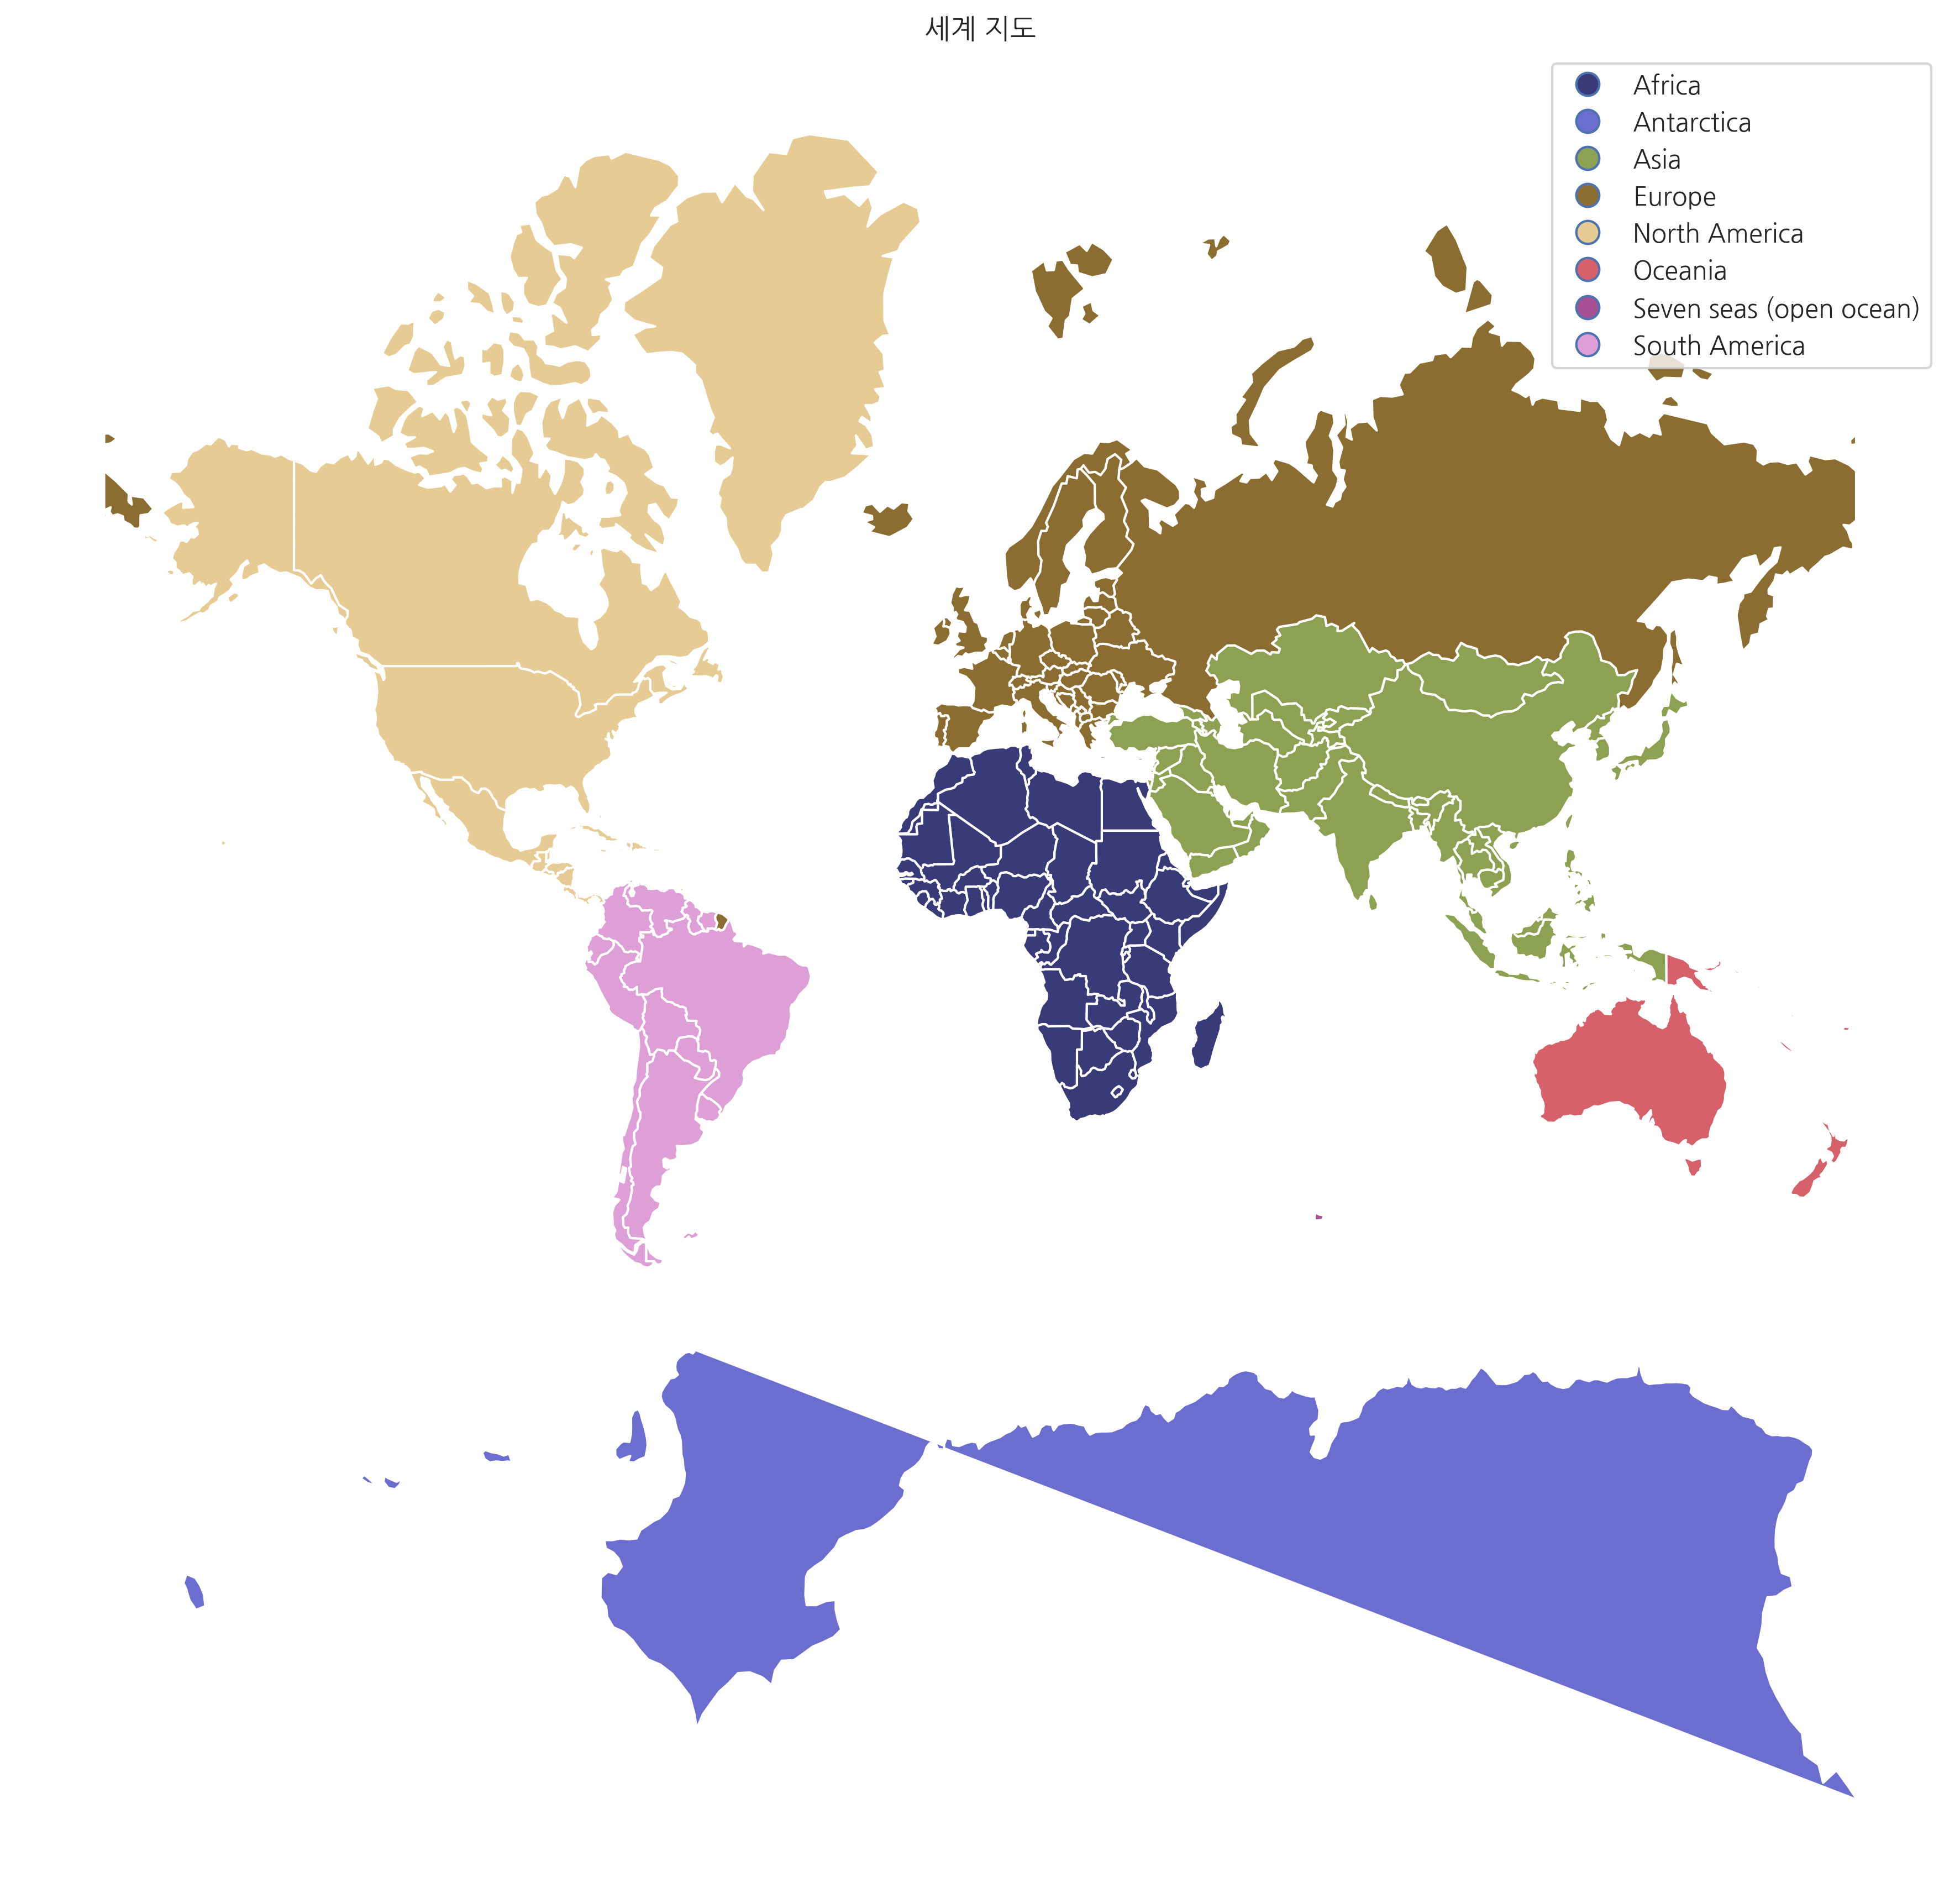

In [29]:
ax = countries_mercator.plot(
    figsize=(15, 15), column='continent', cmap="tab20b", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()